# Python Data Visualization with Matplotlib

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## set the style back to default 
plt.style.use("default")

In [137]:
## set the graphics parameters

large = 22
medium = 16
small = 12

params = {"figure.figsize":(16,10),
          "axes.titlesize":large,
          "axes.labelsize":medium,
          "legend.fontsize":medium,
          "xtick.labelsize":small
         }

plt.rcParams.update(params)
plt.style.use("seaborn-whitegrid")
sns.set_style("white")

In [119]:
data = pd.read_csv("mpg.csv")
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Q1 Dot Plot

In [120]:
data.groupby('manufacturer')['cty'].mean()
##OR 
datavis = data[['cty', 'manufacturer']].groupby('manufacturer').mean()
## second option is better because now it's a dataframe and don't need to groupby the entire thing 

In [121]:
datavis.reset_index(inplace = True)
## inplace = True means that update the index in place w/o need to override the dataframe 

In [122]:
datavis.sort_values('cty', inplace = True)

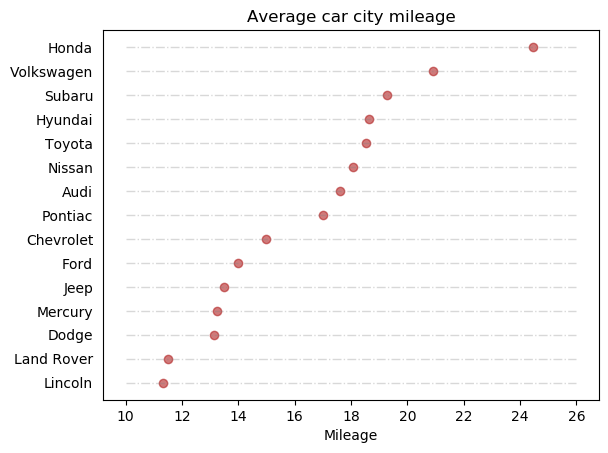

In [123]:
plt.figure()

plt.scatter(x = datavis.cty, 
            y = datavis.manufacturer.str.title(), ## make capital letters
           color = 'firebrick',
           alpha = 0.6)

## add the lines 

ax = plt.gca()
ax.hlines(y = datavis.manufacturer.str.title(),  ## need to do this to both to work 
          xmin = 10, 
          xmax = 26,
          linewidth = 1,
          linestyle = '-.',
          alpha = 0.3,
          color = 'grey')

plt.title("Average car city mileage")
## ax.set_title() does the same thing
plt.xlabel("Mileage")
## ax.set_xlabel() does the same thing 

## get rid of yticks
ax.yaxis.set_ticks_position('none')

plt.show()

## Q2 Diverging Bars

In [124]:
## create a new column cty_z for the z scores of the city variable 

data['cty_z'] = (data['cty'] - data['cty'].mean())/data['cty'].std()

In [125]:
data['cty_z'].std()

0.9999999999999997

In [126]:
datavis = data[['cty_z', 'manufacturer']].\
                    groupby('manufacturer').mean().\
                    sort_values('cty_z').\
                    reset_index()
datavis
## similar to number one but written in a different way
## remember for this need to sort before you reset the index 

,manufacturer,cty_z
0,lincoln,-1.298334
1,land rover,-1.259174
2,dodge,-0.874973
3,mercury,-0.847984
4,jeep,-0.789243
5,ford,-0.671760
6,chevrolet,-0.436795
7,pontiac,0.033136
8,audi,0.176726
9,nissan,0.286176


In [127]:
## create a color variable for the bars

datavis['col'] = ["lightcoral" if i <0 else "mediumseagreen" for i in datavis.cty_z]

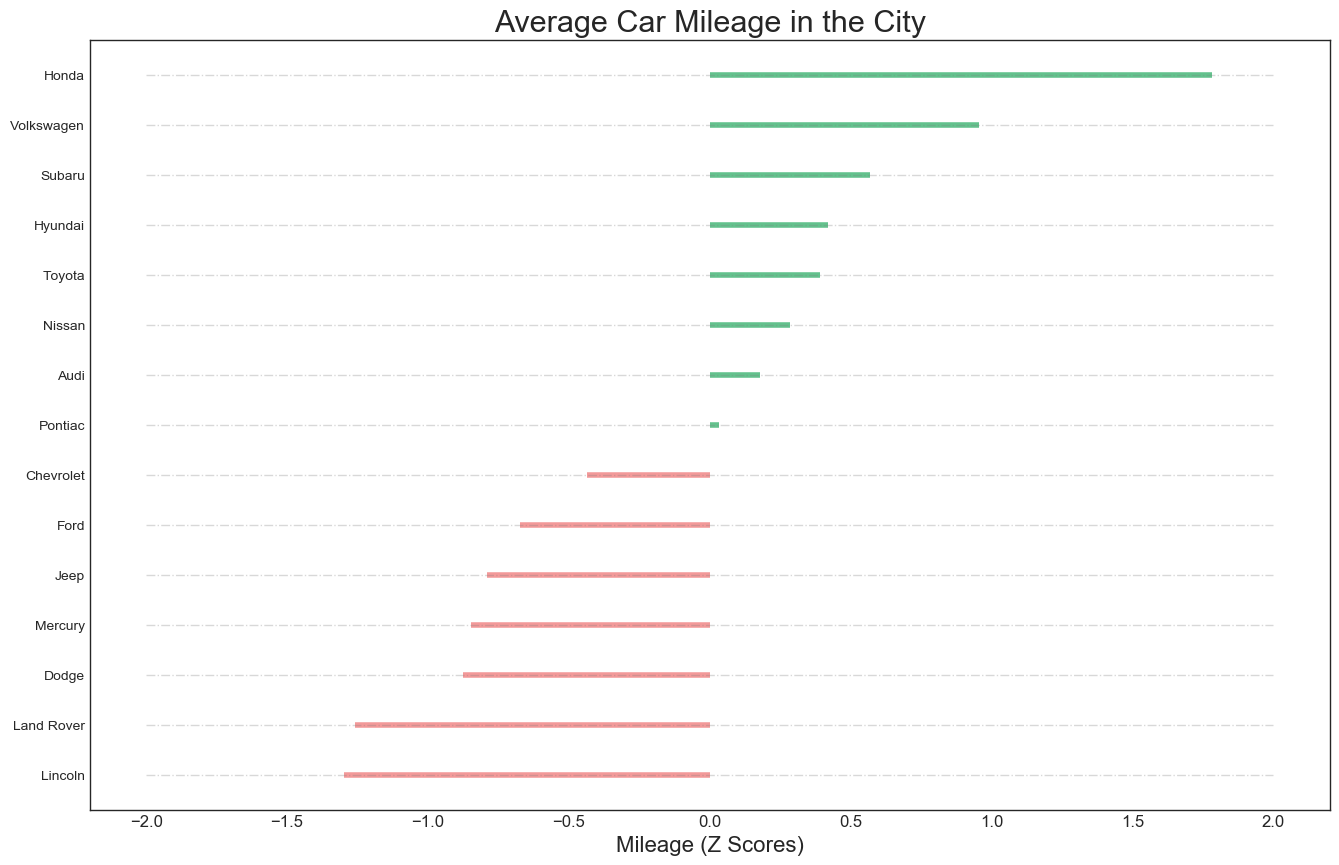

In [138]:
plt.figure()

ax = plt.gca()

ax.hlines(y = datavis.manufacturer.str.title(),  ## create colored lines
         xmin = 0, 
         xmax = datavis.cty_z,
         color = datavis['col'],
         linewidth = 4,
         alpha = 0.8)

ax.hlines(y = datavis.manufacturer.str.title(),  ## create background lines
          xmin = -2, 
          xmax = 2,
          linewidth = 1,
          linestyle = '-.',
          alpha = 0.3,
          color = 'grey')

ax.yaxis.set_ticks_position('none')

ax.set_title("Average Car Mileage in the City")
ax.set_xlabel("Mileage (Z Scores)")

plt.show()

In [107]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Q3 Correllogram

In [140]:
data.corr()

,displ,year,cyl,cty,hwy,cty_z
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020,-0.798524
year,0.147843,1.000000,0.122245,-0.037232,0.002158,-0.037232
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912,-0.805771
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916,1.000000
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000,0.955916
cty_z,-0.798524,-0.037232,-0.805771,1.000000,0.955916,1.000000


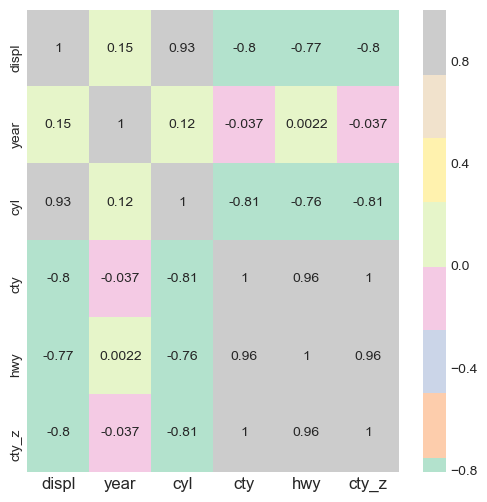

In [162]:
plt.figure(figsize = (6,6))

sns.heatmap(data.corr(),
           cmap = 'Pastel2',## look up more colors on colorbrewer -- that's a website  "Purples" is pretty too 
           center = 0,
           annot = True) 

plt.show()

## Q4 Pairwise Plots

<Figure size 1600x1000 with 0 Axes>

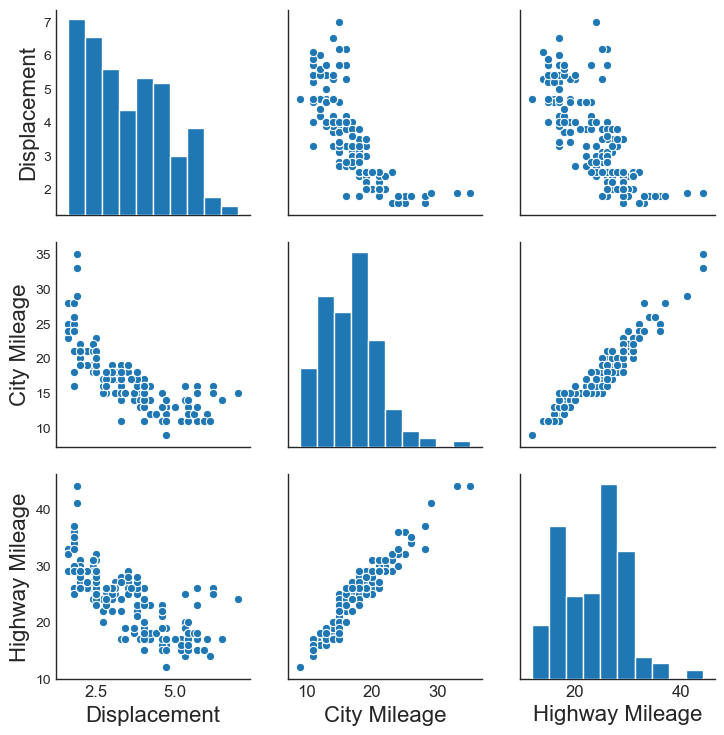

In [171]:
datavis = data[['displ', 'cty', 'hwy']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage']

plt.figure()

sns.pairplot(datavis)


plt.show()

## Q5

<Figure size 1600x1000 with 0 Axes>

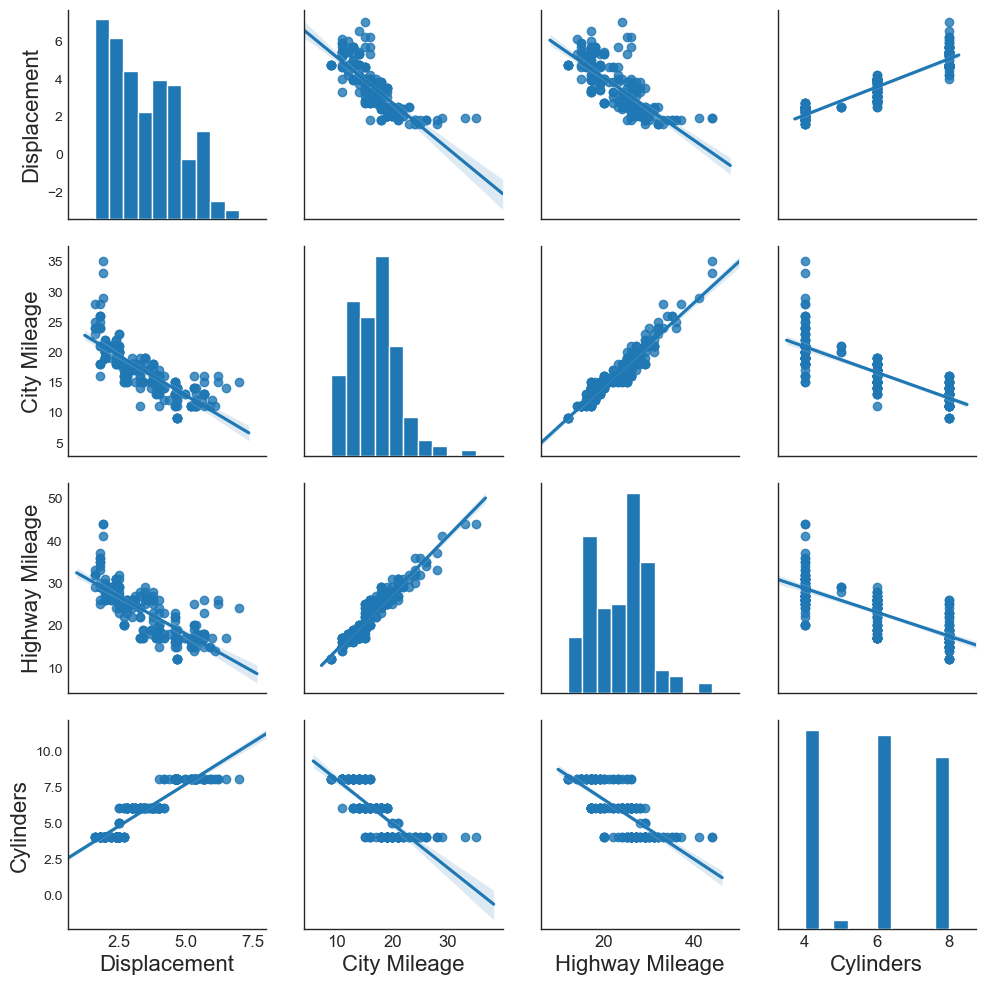

In [173]:
datavis = data[['displ', 'cty', 'hwy', 'cyl']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage', 'Cylinders']

plt.figure()

sns.pairplot(datavis, kind = "reg")


plt.show()

## Q6

/Users/Jenny/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Jenny/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1600x1000 with 0 Axes>

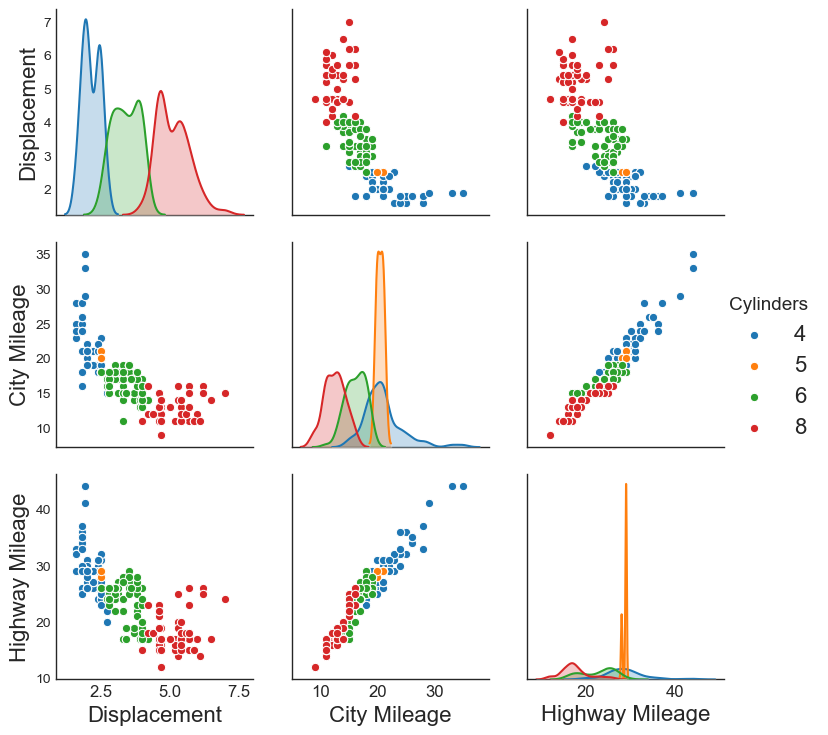

In [188]:
datavis = data[['displ', 'cty', 'hwy', 'cyl']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage', 'Cylinders']

plt.figure()

sns.pairplot(datavis,
             x_vars = ['Displacement', 'City Mileage', 'Highway Mileage'],
             y_vars = ['Displacement', 'City Mileage', 'Highway Mileage'],
             hue = 'Cylinders'
            )


plt.show()